In [4]:
import xarray as xr
import pyvista as pv
from glacier3dviz.tools import Glacier3DViz

ds_glacier = xr.open_dataset("oggm_constant_climate_dummy_data.nc")

viz = Glacier3DViz(
    ds_glacier,  # dataset for visualization
    x='x',  # x-coordinate name, default is 'x'
    y='y',  # y-coordinate name, default is 'y'
    time='time',  # time coordinate name, default is 'time'
    topo_bedrock='bedrock',  # bedrock data variable, default is 'bedrock'
    ice_thickness='simulated_thickness',
    # evolving ice thickness variable, default is 'simulated_thickness'
    time_var_display='calendar_year',
    # time format displayed, opting for total years here
    show_topo_side_walls=True,
    use_texture=True,
    camera_args={  # camera view settings, more details later
        'azimuth': -135,  # rotate around the z-axis
        'elevation': 20,  # elevation angle above ground
    }
)

viz.show()

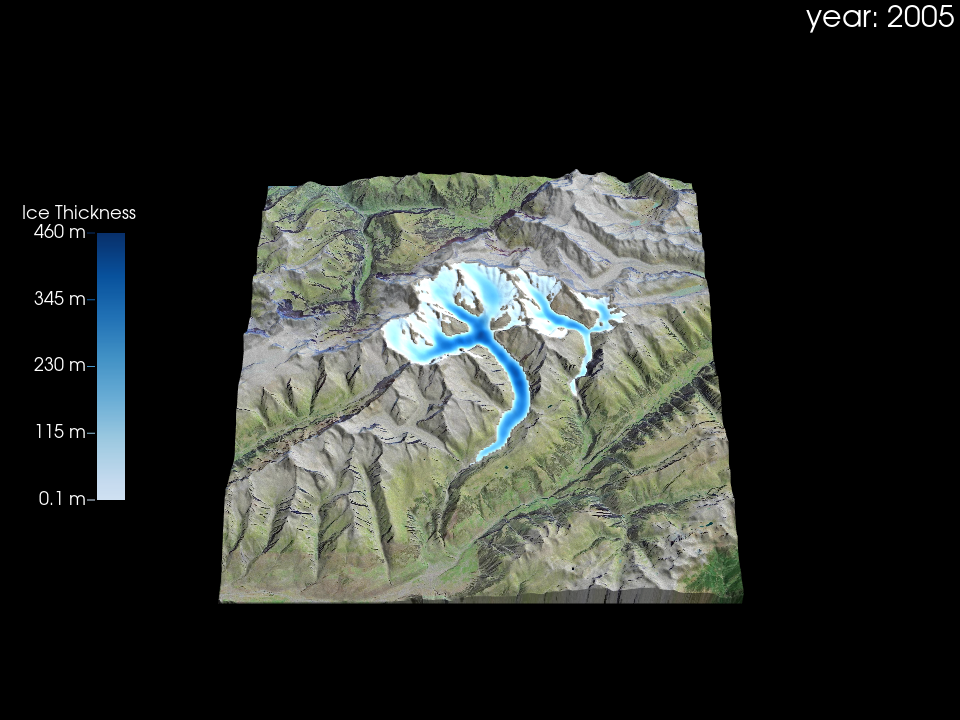

In [2]:
kwargs_linear_camera_trajectory = dict(start_point=(0, -1, 10),
                                end_point=(0, -0.5, 5))

viz.export_animation(filename='linear_moving_camera_example.mp4',
                     camera_trajectory='linear',
                     kwargs_camera_trajectory=kwargs_linear_camera_trajectory
                     )

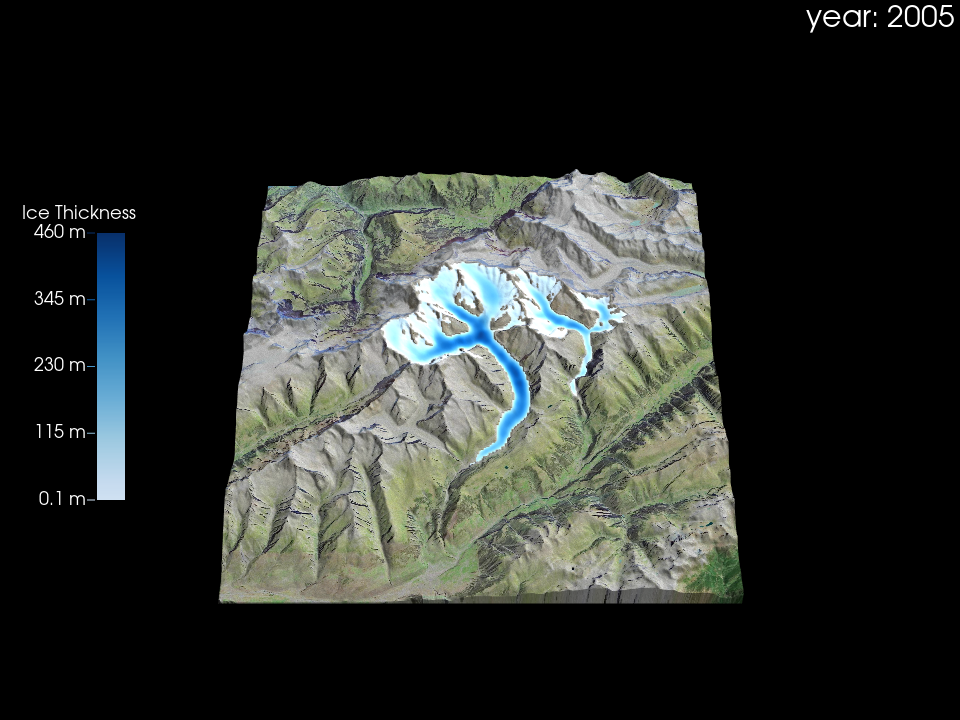

In [5]:
kwargs_rotate_camera_trajectory = dict(start_angle=200,
                                       end_angle=220,
                                       camera_height=2,
                                       camera_radius=0.5
                                )

viz.export_animation(filename='rotating_camera_example.mp4',
                     camera_trajectory='rotate',
                     kwargs_camera_trajectory=kwargs_rotate_camera_trajectory
                     )